<a href="https://colab.research.google.com/github/r0cketr1kky/COVID-19_X-Ray/blob/master/boundbox_rocket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [0]:
import cv2
import matplotlib.pyplot as plt

In [0]:
arr = cv2.imread('/gdrive/My Drive/results_SCAM/vgg16_chess.png')

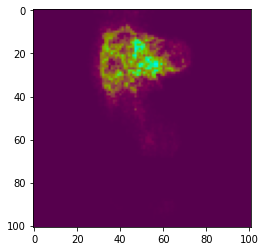

In [0]:
plt.imshow(arr)

In [0]:
arr.shape

(101, 101, 3)

In [0]:
hsv = cv2.cvtColor(arr, cv2.COLOR_BGR2HSV)

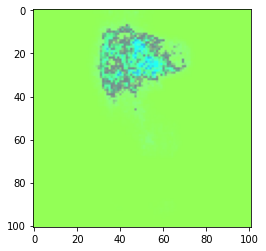

In [0]:
plt.imshow(hsv)

In [0]:
import numpy as np

In [0]:
lower_blue = np.array([20,100,100])
upper_blue = np.array([100,255,255])


# Threshold the HSV image to get only blue colors
mask = cv2.inRange (hsv, lower_blue, upper_blue)

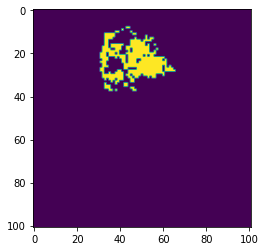

In [0]:
plt.imshow(mask)

In [0]:
bluecnts = cv2.findContours(mask.copy(),
                              cv2.RETR_EXTERNAL,
                              cv2.CHAIN_APPROX_SIMPLE)[-2]

In [0]:
blue_area = max(bluecnts, key=cv2.contourArea)
(xg,yg,wg,hg) = cv2.boundingRect(blue_area)
cv2.rectangle(arr,(xg,yg),(xg+wg, yg+hg),(0,255,0),2)
print(xg, yg, xg+wg, yg+hg)

31 10 66 35


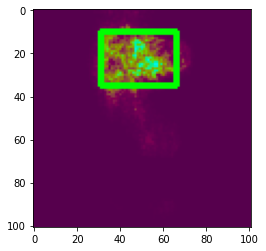

In [0]:
plt.imshow(arr)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


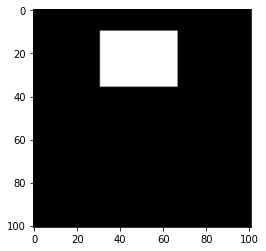

In [0]:
mask = np.zeros((101, 101, 3))
poly = np.array([
	[(xg, yg), (xg+wg, yg), (xg+wg, yg+hg), (xg, yg+hg)]
	])


cv2.fillPoly(mask, poly, (255,255,255))

plt.imshow(mask)

In [0]:
result = np.multiply(arr, mask)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


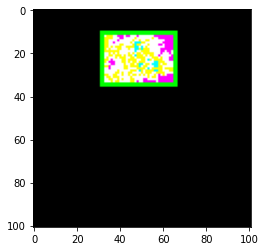

In [0]:
plt.imshow(result)

In [0]:
result.shape

(101, 101, 3)